In [104]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import os
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [26]:
fb_data = pd.read_csv(os.path.dirname(os.getcwd()) + "/raw_data/food_balance_sheet.csv")

In [27]:
years = list(range(1961, 2020))
economies = {
    41: ["BRA", "URY", "ARG", "GBR"],
    61: ["CHN", "RUS", "JPN", "KOR", "PRK"],
    81: ["AUS", "NZL"],
}

fb_data = fb_data.rename(
    columns={
        "Country (ISO3 code)": "Country",
        "Element (Name)": "Type",
        "FAOSTAT group (Name)": "FAOSTAT",
    }
)
fb_data = fb_data.rename(columns={f"[{year}]": year for year in years})
fb_data = fb_data[["Country", "Type", "FAOSTAT"] + years].dropna()
fb_data = pd.melt(fb_data, id_vars=["Country", "Type", "FAOSTAT"], var_name="Year", value_name="Value")

In [41]:
types = fb_data["Type"].unique()
faostat_groups = fb_data["FAOSTAT"].unique()
years = fb_data["Year"].unique()
ocean_groups = [g for g in faostat_groups if not g.startswith("Freshwater")]

In [60]:
types

array(['Food exports', 'Food imports', 'Non-food uses', 'Production',
       'Stock variations', 'Total food supply'], dtype=object)

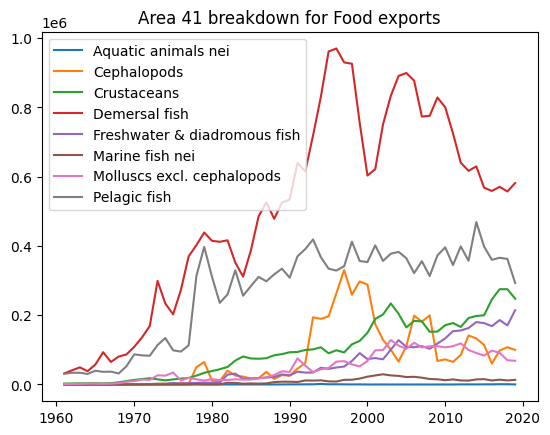

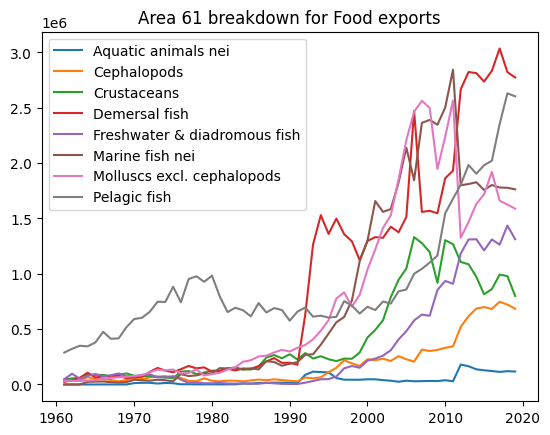

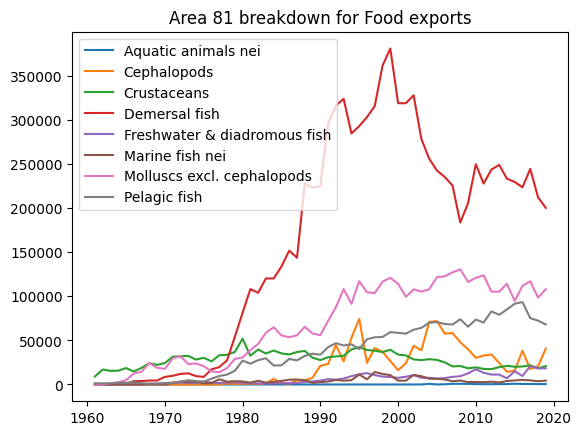

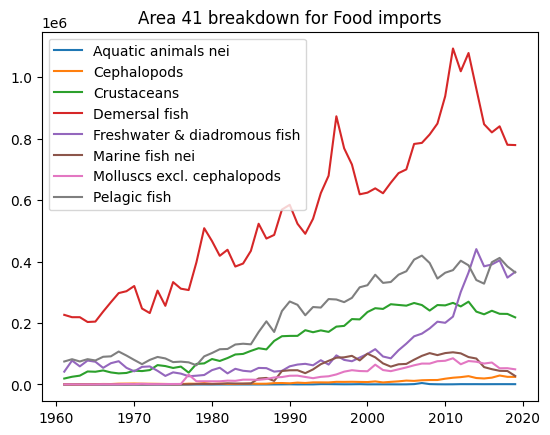

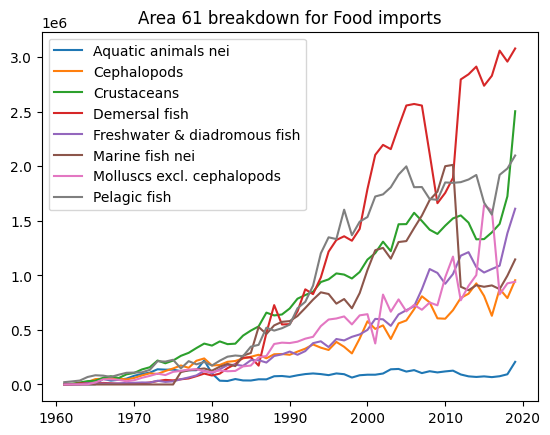

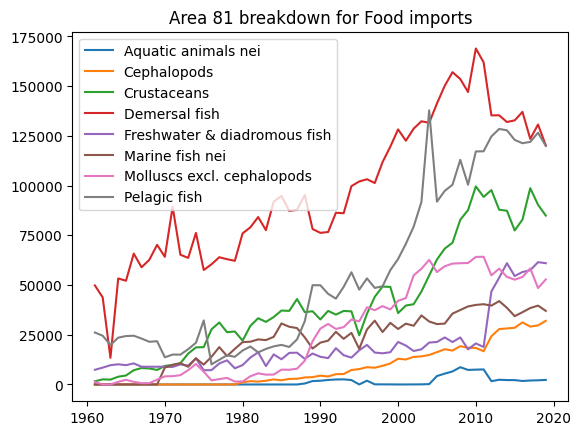

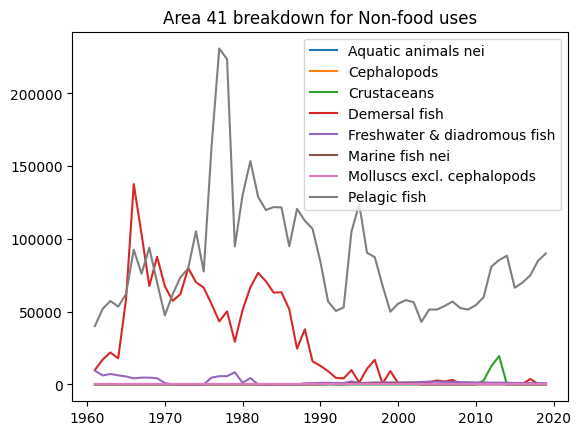

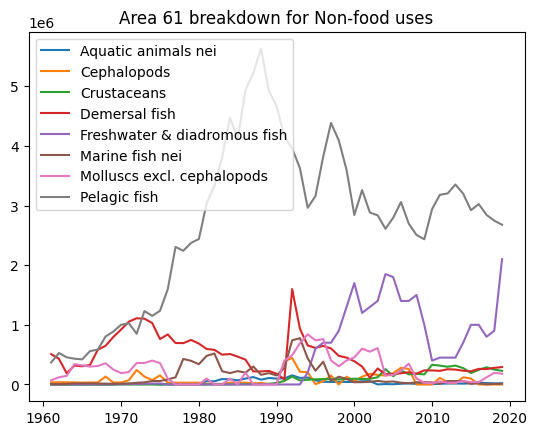

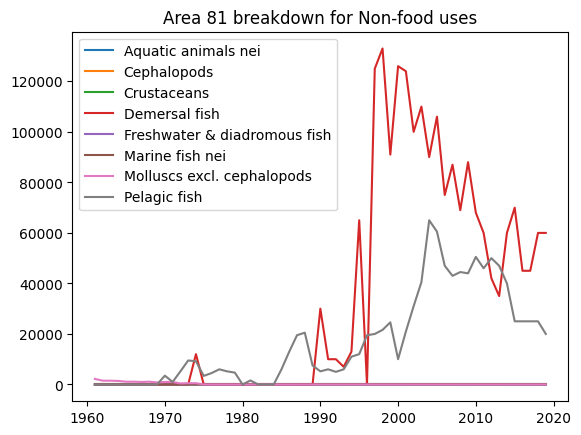

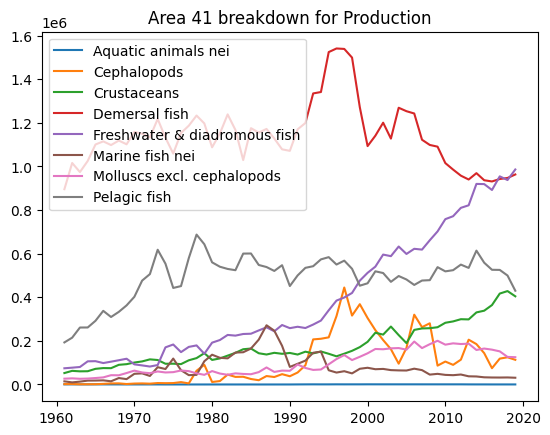

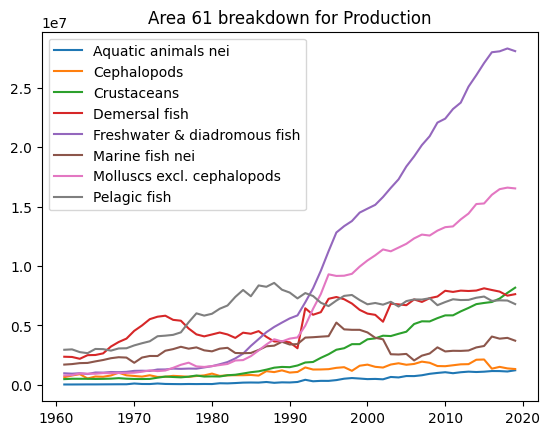

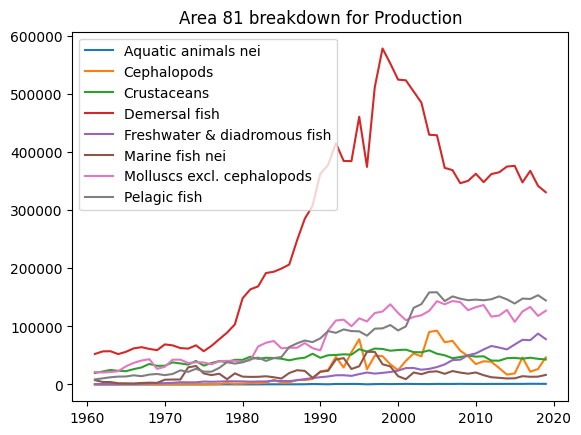

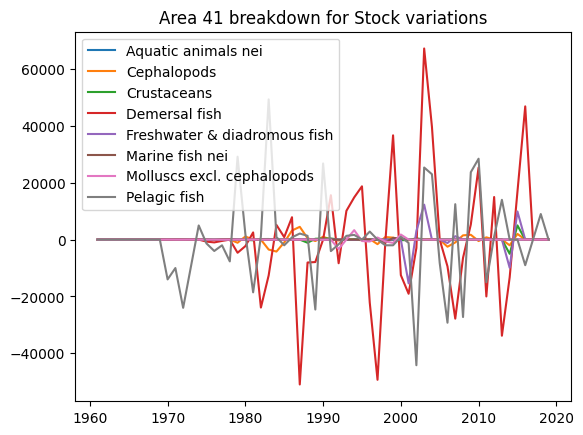

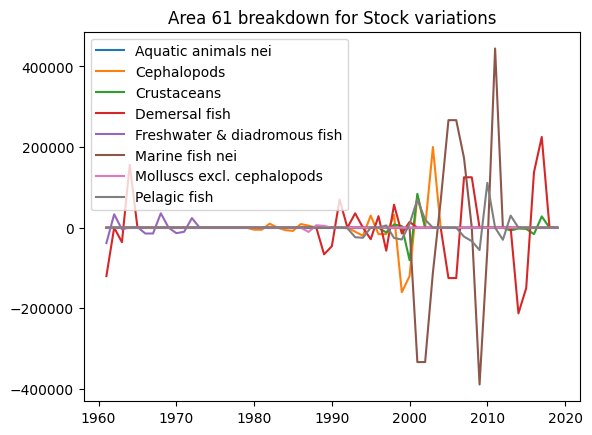

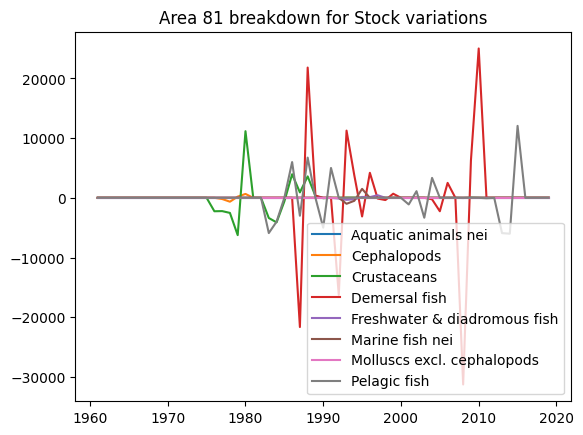

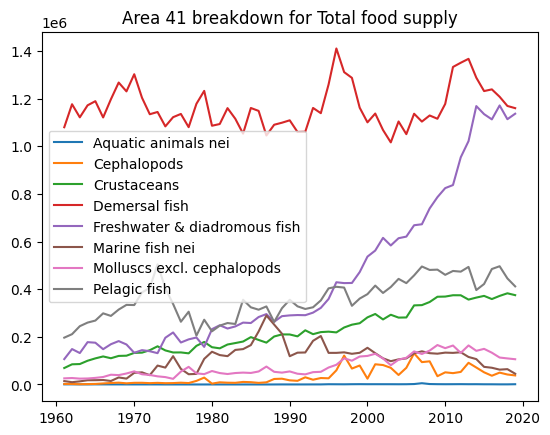

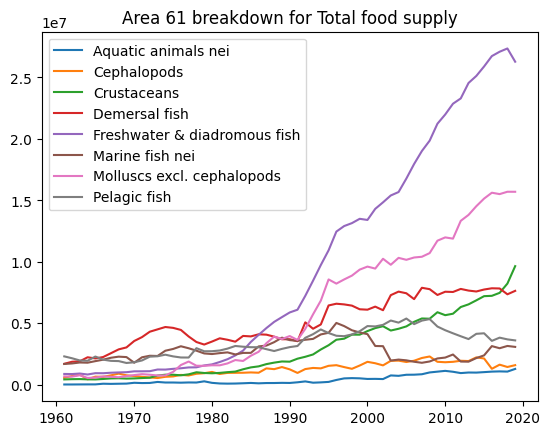

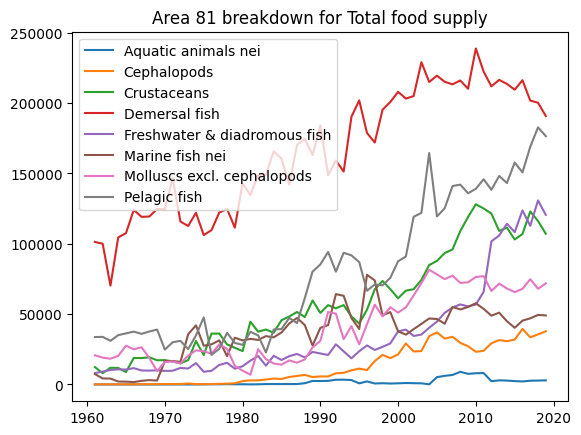

In [38]:
for econ_type in fb_data["Type"].unique():
    fb_type = fb_data[fb_data["Type"] == econ_type].drop(columns="Type")
    fb_areas = []
    for area, countries in economies.items():
        fb_area = fb_type[fb_type["Country"].isin(countries)]
        fb_area = (
            fb_area.groupby(["FAOSTAT", "Year"])
            .sum()
            .reset_index()
            .drop(columns="Country")
        )

        for faostat in faostat_groups:
            plt.plot(
                years,
                fb_area[fb_area["FAOSTAT"] == faostat]["Value"],
                label=faostat,
            )

        plt.title(f"Area {area} breakdown for {econ_type}")
        plt.legend()
        plt.show()

/var/folders/3h/wffpfgs16x35fp5xl_dt66mm0000gn/T/ipykernel_84197/459874224.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fb_area = fb_type[fb_data["Country"].isin(countries)]
/var/folders/3h/wffpfgs16x35fp5xl_dt66mm0000gn/T/ipykernel_84197/459874224.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fb_area = fb_type[fb_data["Country"].isin(countries)]
/var/folders/3h/wffpfgs16x35fp5xl_dt66mm0000gn/T/ipykernel_84197/459874224.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fb_area = fb_type[fb_data["Country"].isin(countries)]


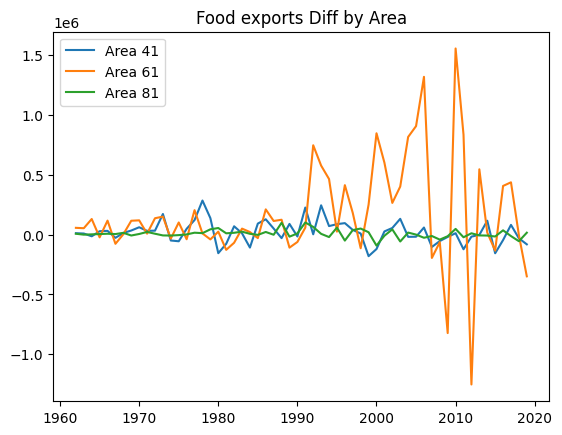

/var/folders/3h/wffpfgs16x35fp5xl_dt66mm0000gn/T/ipykernel_84197/459874224.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fb_area = fb_type[fb_data["Country"].isin(countries)]
/var/folders/3h/wffpfgs16x35fp5xl_dt66mm0000gn/T/ipykernel_84197/459874224.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fb_area = fb_type[fb_data["Country"].isin(countries)]
/var/folders/3h/wffpfgs16x35fp5xl_dt66mm0000gn/T/ipykernel_84197/459874224.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fb_area = fb_type[fb_data["Country"].isin(countries)]


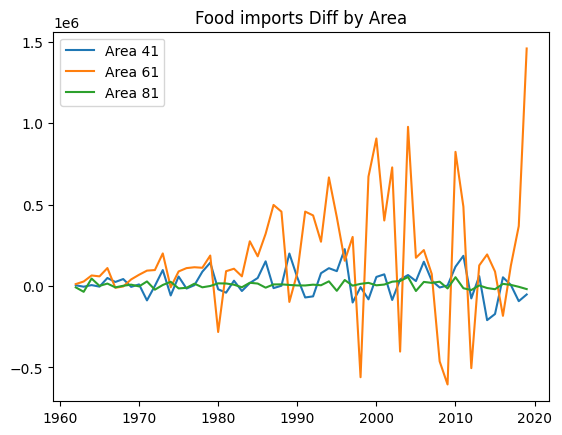

/var/folders/3h/wffpfgs16x35fp5xl_dt66mm0000gn/T/ipykernel_84197/459874224.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fb_area = fb_type[fb_data["Country"].isin(countries)]
/var/folders/3h/wffpfgs16x35fp5xl_dt66mm0000gn/T/ipykernel_84197/459874224.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fb_area = fb_type[fb_data["Country"].isin(countries)]
/var/folders/3h/wffpfgs16x35fp5xl_dt66mm0000gn/T/ipykernel_84197/459874224.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fb_area = fb_type[fb_data["Country"].isin(countries)]


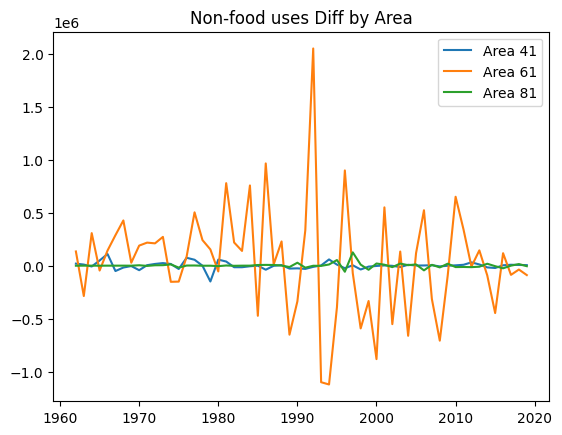

/var/folders/3h/wffpfgs16x35fp5xl_dt66mm0000gn/T/ipykernel_84197/459874224.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fb_area = fb_type[fb_data["Country"].isin(countries)]
/var/folders/3h/wffpfgs16x35fp5xl_dt66mm0000gn/T/ipykernel_84197/459874224.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fb_area = fb_type[fb_data["Country"].isin(countries)]
/var/folders/3h/wffpfgs16x35fp5xl_dt66mm0000gn/T/ipykernel_84197/459874224.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fb_area = fb_type[fb_data["Country"].isin(countries)]


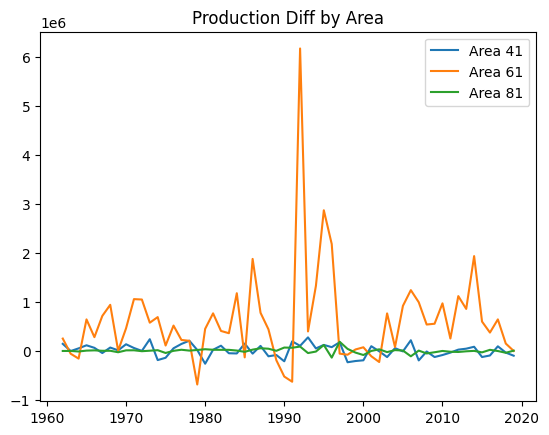

/var/folders/3h/wffpfgs16x35fp5xl_dt66mm0000gn/T/ipykernel_84197/459874224.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fb_area = fb_type[fb_data["Country"].isin(countries)]
/var/folders/3h/wffpfgs16x35fp5xl_dt66mm0000gn/T/ipykernel_84197/459874224.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fb_area = fb_type[fb_data["Country"].isin(countries)]
/var/folders/3h/wffpfgs16x35fp5xl_dt66mm0000gn/T/ipykernel_84197/459874224.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fb_area = fb_type[fb_data["Country"].isin(countries)]


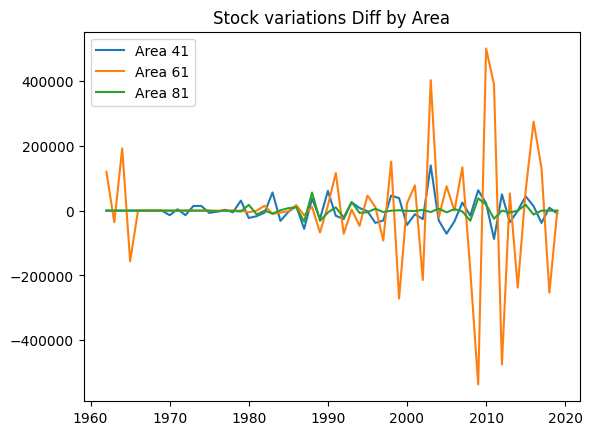

/var/folders/3h/wffpfgs16x35fp5xl_dt66mm0000gn/T/ipykernel_84197/459874224.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fb_area = fb_type[fb_data["Country"].isin(countries)]
/var/folders/3h/wffpfgs16x35fp5xl_dt66mm0000gn/T/ipykernel_84197/459874224.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fb_area = fb_type[fb_data["Country"].isin(countries)]
/var/folders/3h/wffpfgs16x35fp5xl_dt66mm0000gn/T/ipykernel_84197/459874224.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fb_area = fb_type[fb_data["Country"].isin(countries)]


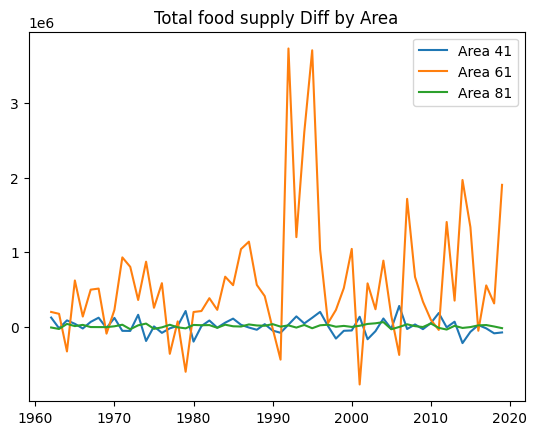

In [128]:
fb_data_area = {}

for econ_type in types:
    fb_data_area[econ_type] = {}
    fb_type = fb_data[fb_data["Type"] == econ_type].drop(columns="Type")
    for area, countries in economies.items():
        fb_area = fb_type[fb_data["Country"].isin(countries)]
        fb_area = fb_area[fb_area["FAOSTAT"].isin(ocean_groups)]
        fb_area = fb_area.groupby("Year").sum()
        fb_area["Diff"] = fb_area["Value"].diff()
        fb_data_area[econ_type][area] = fb_area.drop(columns=["Country", "FAOSTAT"]).reset_index()

        plt.plot(years, fb_area["Diff"], label=f"Area {area}")

    plt.legend()
    plt.title(f"{econ_type} Diff by Area")
    plt.show()

In [115]:
with open(
    os.path.dirname(os.getcwd()) + "/model_data/target_data_prototype.pkl", "rb"
) as file:
    target_data = pickle.load(file)

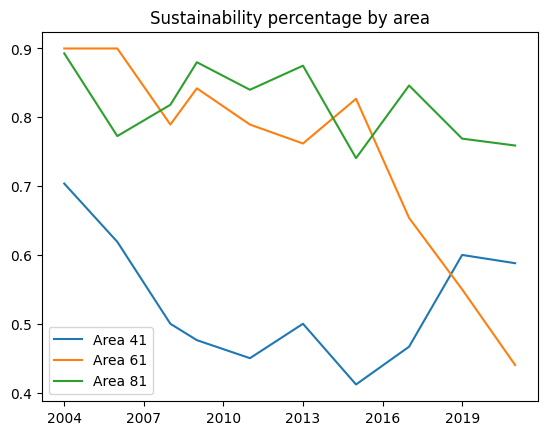

In [116]:
target_years = np.array([2004, 2006, 2008, 2009, 2011, 2013, 2015, 2017, 2019, 2021], dtype=int)

for area in [41, 61, 81]:
    t_area = target_data[target_data["Area"] == area]
    plt.plot(target_years, t_area["S"], label=f"Area {area}")

plt.legend()
plt.title("Sustainability percentage by area")
plt.xticks(range(2004,2022,3))
plt.show()

In [158]:
def time_lag_report(indicator_data, time_lag, target_data, diff=True, years_witheld=[]):
    lagged_data = pd.DataFrame()
    for area, data in indicator_data.items():
        df = pd.DataFrame()
        for t in range(2, time_lag + 3):
            if t in years_witheld:
                continue
            y = target_years - t
            key = "Diff" if diff else "Value"
            df[f"t_{t}"] = data[data["Year"].isin(y)].reset_index()[key] / 1e6
        df["Area"] = [area] * len(df)
        df["Year"] = target_years
        if lagged_data.empty:
            lagged_data = df
        else:
            lagged_data = pd.concat([lagged_data, df])

    lagged_data["Time"] = lagged_data["Year"] - 2004
    merged_data = pd.merge(
        lagged_data, target_data, how="inner", on=["Year", "Area"]
    ).drop(columns="Year")

    formula = "S ~ " + " + ".join(
        [f"t_{t}" for t in range(2, time_lag + 3) if t not in years_witheld]
    ) + " + Time"
    ind = sm.cov_struct.Stationary(max_lag=time_lag)
    model = smf.gee(formula, "Area", merged_data, cov_struct=ind).fit()
    print(model.summary())

    plt.scatter(model.predict(), model.resid_pearson, alpha=0.7)
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Pearson Residuals vs. Fitted Values')
    plt.xlabel('Fitted Values')
    plt.ylabel('Pearson Residuals')
    plt.grid(True)
    plt.show()

Food exports
                               GEE Regression Results                              
Dep. Variable:                           S   No. Observations:                   30
Model:                                 GEE   No. clusters:                        3
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:           Stationary   Num. iterations:                    23
Date:                     Fri, 20 Dec 2024   Scale:                           0.034
Covariance type:                    robust   Time:                         15:09:10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8136      0.034     23.613      0.000       0.746       

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/cov_struct.py:606: FutureWarning: grid=True will become default in a future version
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/cov_struct.py:172: UserWarning: At least one covariance matrix was not PSD and required projection.
  warnings.warn(msg)


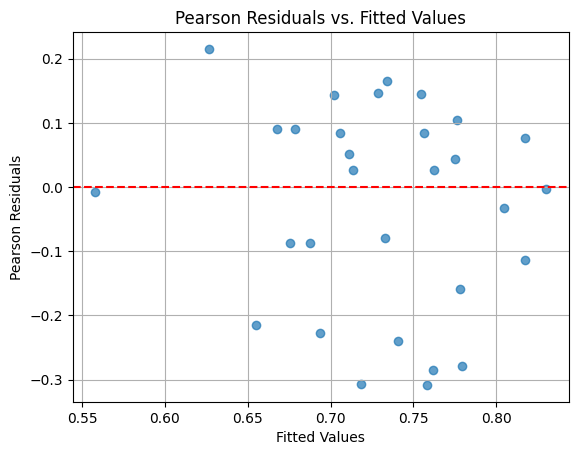

Food imports
                               GEE Regression Results                              
Dep. Variable:                           S   No. Observations:                   30
Model:                                 GEE   No. clusters:                        3
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:           Stationary   Num. iterations:                    16
Date:                     Fri, 20 Dec 2024   Scale:                           0.037
Covariance type:                    robust   Time:                         15:09:10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8195      0.061     13.372      0.000       0.699       

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/cov_struct.py:606: FutureWarning: grid=True will become default in a future version
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/cov_struct.py:172: UserWarning: At least one covariance matrix was not PSD and required projection.
  warnings.warn(msg)


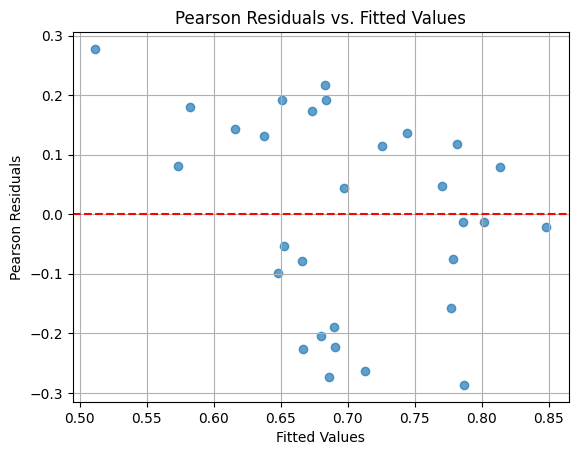

Non-food uses
                               GEE Regression Results                              
Dep. Variable:                           S   No. Observations:                   30
Model:                                 GEE   No. clusters:                        3
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:           Stationary   Num. iterations:                    23
Date:                     Fri, 20 Dec 2024   Scale:                           0.039
Covariance type:                    robust   Time:                         15:09:10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7724      0.045     17.114      0.000       0.684      

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/cov_struct.py:606: FutureWarning: grid=True will become default in a future version
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/cov_struct.py:172: UserWarning: At least one covariance matrix was not PSD and required projection.
  warnings.warn(msg)


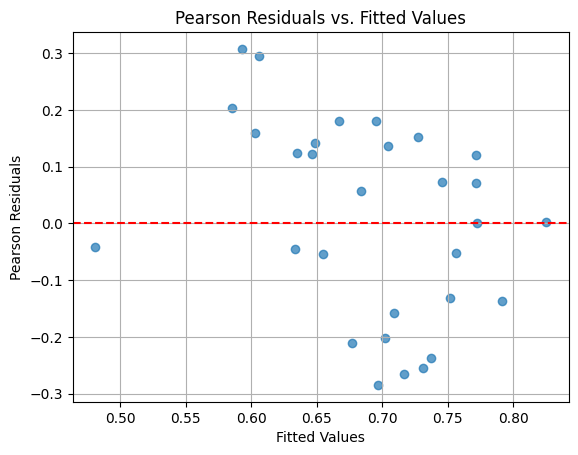

Production
                               GEE Regression Results                              
Dep. Variable:                           S   No. Observations:                   30
Model:                                 GEE   No. clusters:                        3
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:           Stationary   Num. iterations:                    13
Date:                     Fri, 20 Dec 2024   Scale:                           0.064
Covariance type:                    robust   Time:                         15:09:10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8015      0.073     11.007      0.000       0.659       0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/cov_struct.py:606: FutureWarning: grid=True will become default in a future version
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/cov_struct.py:172: UserWarning: At least one covariance matrix was not PSD and required projection.
  warnings.warn(msg)


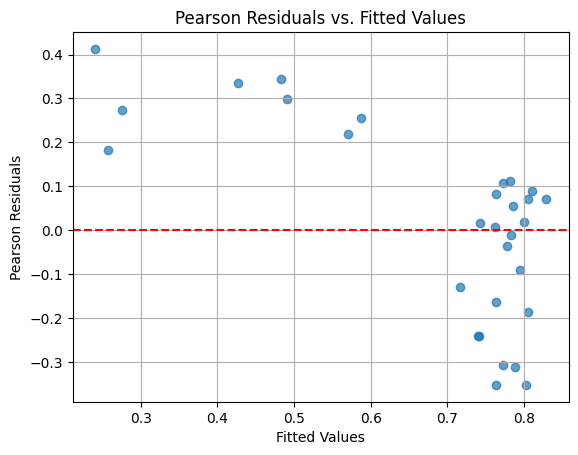

Stock variations
                               GEE Regression Results                              
Dep. Variable:                           S   No. Observations:                   30
Model:                                 GEE   No. clusters:                        3
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:           Stationary   Num. iterations:                    32
Date:                     Fri, 20 Dec 2024   Scale:                           0.033
Covariance type:                    robust   Time:                         15:09:10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7957      0.027     29.212      0.000       0.742   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/cov_struct.py:606: FutureWarning: grid=True will become default in a future version
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/cov_struct.py:172: UserWarning: At least one covariance matrix was not PSD and required projection.
  warnings.warn(msg)


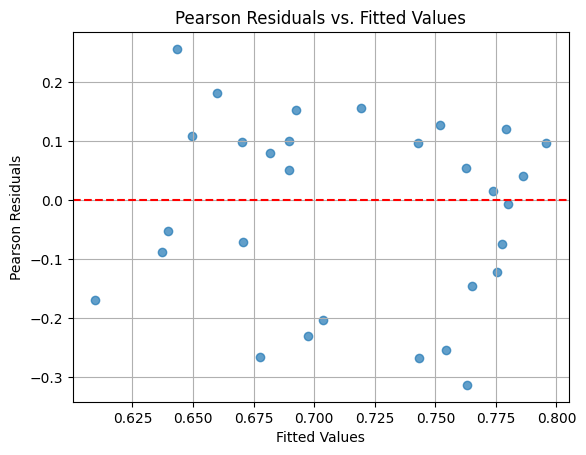

Total food supply
                               GEE Regression Results                              
Dep. Variable:                           S   No. Observations:                   30
Model:                                 GEE   No. clusters:                        3
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:           Stationary   Num. iterations:                    15
Date:                     Fri, 20 Dec 2024   Scale:                           0.046
Covariance type:                    robust   Time:                         15:09:10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8523      0.050     17.022      0.000       0.754  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/cov_struct.py:606: FutureWarning: grid=True will become default in a future version
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/cov_struct.py:172: UserWarning: At least one covariance matrix was not PSD and required projection.
  warnings.warn(msg)


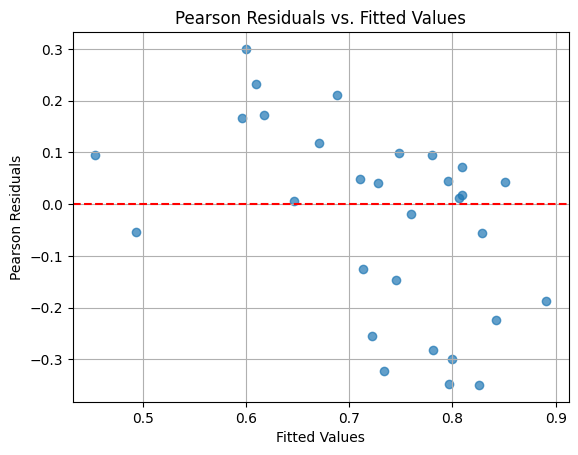

In [159]:
for k, v in fb_data_area.items():
    diff = k != "Stock variations"
    print(k)
    time_lag_report(v, 5, target_data, diff=diff)

In [145]:
time_lag_report(fb_data_area["Total food supply"], 4, target_data, diff=True, years_witheld=[2,5])

                               GEE Regression Results                              
Dep. Variable:                           S   No. Observations:                   30
Model:                                 GEE   No. clusters:                        3
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:           Stationary   Num. iterations:                    13
Date:                     Fri, 20 Dec 2024   Scale:                           0.044
Covariance type:                    robust   Time:                         14:44:14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6893      0.031     22.040      0.000       0.628       0.751
t_3    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/cov_struct.py:606: FutureWarning: grid=True will become default in a future version
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/cov_struct.py:172: UserWarning: At least one covariance matrix was not PSD and required projection.
  warnings.warn(msg)
